In [1]:
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s_fac = [-0.9848630187074249, -0.9554278458272991, -0.9289312863318809, -0.9020987258373515, -0.8770188774973857, -0.8542436677827702, -0.8281060200409812, -0.801609833416762, -0.7762610715287678, -0.7506026622169292]
i_fac = [-0.28623628381001304, -0.29790470016687143, -0.28801191927422437, -0.28491231760093877, -0.26978056278323936, -0.23962773525535738, -0.23124421075210222, -0.22537020796131677, -0.22253164631040584, -0.16077037718991144]
r_fac = [-1.2325567478448909, -0.6007041385158307, -0.45737255533737864, -0.37335000700896687, -0.33975504154501934, -0.3236358086231508, -0.29122066198828156, -0.2649272246861822, -0.24063951663890842, -0.24257475461175793]

In [2]:
r_0 = []
iratio = []
rratio = []
for i in range(10):
    r_0.append(-1.0 / (gamma[i] * s_fac[i]))
    iratio.append(i_fac[i]/ s_fac[i])
    rratio.append(r_fac[i]/ s_fac[i])
print(r_0)

[10.153696311111787, 5.23325756291992, 3.588352962570396, 2.7713152988653595, 2.2804526234453393, 1.9510436302004777, 1.7251069235080936, 1.5593621084612082, 1.4313626586000119, 1.332262794067993]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

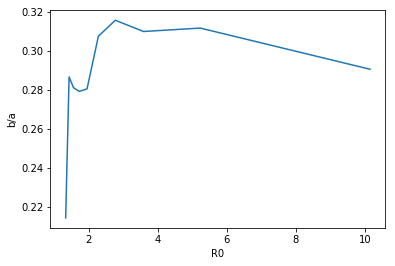

In [4]:
plt.xlabel("R0")
plt.ylabel("b/a")
plt.plot(r_0, iratio)

In [5]:
import numpy, pandas
titles = ['r_0', 'iratio']
matrix = [r_0, iratio]
df = pandas.DataFrame(numpy.array(matrix).T, columns=titles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_0,10.0,3.202621,2.722571,1.332263,1.600798,2.115748,3.384094,10.153696
iratio,10.0,0.287769,0.029529,0.214188,0.280673,0.288653,0.309438,0.315833


In [6]:
df.corr()

,r_0,iratio
r_0,1.00000,0.30273
iratio,0.30273,1.00000


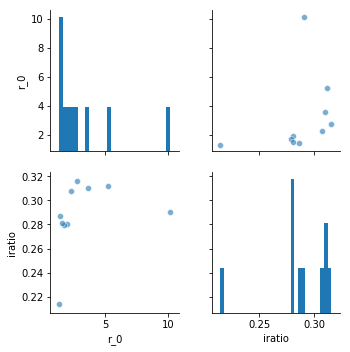

In [7]:
import seaborn as sns
sns.pairplot(df,
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
y = df['iratio'].values
df = df.drop('iratio', axis=1)
x = df.values
lm = LinearRegression(fit_intercept=True)
lm.fit(x, y)
y_pred = lm.predict(x)
msg = 'model: iratio = {} + {} R_0'.format(lm.intercept_, lm.coef_[0])
print(msg)

model: iratio = 0.2772537703751119 + 0.003283442687806802 R_0


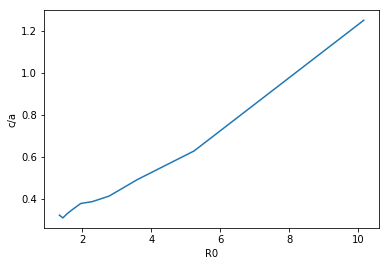

In [10]:
plt.xlabel("R0")
plt.ylabel("c/a")
plt.plot(r_0, rratio)

In [11]:
titles = ['r_0', 'rratio']
matrix = [r_0, rratio]
df = pandas.DataFrame(numpy.array(matrix).T, columns=titles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_0,10.0,3.202621,2.722571,1.332263,1.600798,2.115748,3.384094,10.153696
rratio,10.0,0.486805,0.285291,0.309998,0.335788,0.383127,0.472740,1.251501


In [12]:
df.corr()

,r_0,rratio
r_0,1.000000,0.992741
rratio,0.992741,1.000000


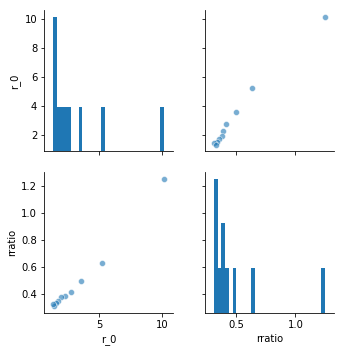

In [13]:
sns.pairplot(df,
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [14]:
y = df['rratio'].values
df = df.drop('rratio', axis=1)
x = df.values
lm = LinearRegression(fit_intercept=True)
lm.fit(x, y)
y_pred = lm.predict(x)
msg = 'model: rratio = {} + {} R_0'.format(lm.intercept_, lm.coef_[0])
print(msg)

model: rratio = 0.15364740760397894 + 0.10402658027539623 R_0
